In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Ignorar los warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing
from sklearn.model_selection import GridSearchCV


In [ ]:
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv("Baseplcascruzadas.csv",  sep=';', encoding='utf-8')

# Muestra las primeras filas del DataFrame para verificar la carga exitosa
print(df.head())

    Placa departamento        ciudad    servicio   SoloFecha SoloHora  \
0  ESM393    ATLANTICO       MALAMBO  PARTICULAR  28/06/2023  2:39:00   
1  TEQ088        CESAR  ROBLES (LA P     PUBLICO  28/06/2023  4:45:00   
2  VEW945       CALDAS    VILLAMARIA     PUBLICO  28/06/2023  5:23:00   
3  WOX865      QUINDIO       CALARCA     PUBLICO  28/06/2023  5:37:00   
4  SXI696        CAUCA       POPAYAN     PUBLICO  28/06/2023  5:42:00   

   DiaSemana       FECHA_HORA  
0  miércoles  28/06/2023 2:39  
1  miércoles  28/06/2023 4:45  
2  miércoles  28/06/2023 5:23  
3  miércoles  28/06/2023 5:37  
4  miércoles  28/06/2023 5:42  


In [ ]:
# Leer el archivo CSV
data = pd.read_csv('Baseplcascruzadas.csv', sep=';', encoding='utf-8')
data = data.sample(n=100000, random_state=42)

Classification Report:
              precision    recall  f1-score      support
Motocicleta    1.000000  1.000000  1.000000   1669.00000
OFICIAL        0.934783  0.508876  0.659004    169.00000
PARTICULAR     0.959958  0.990760  0.975116  11905.00000
PUBLICO        0.980343  0.932556  0.955852   6257.00000
accuracy       0.969250  0.969250  0.969250      0.96925
macro avg      0.968771  0.858048  0.897493  20000.00000
weighted avg   0.969464  0.969250  0.968495  20000.00000


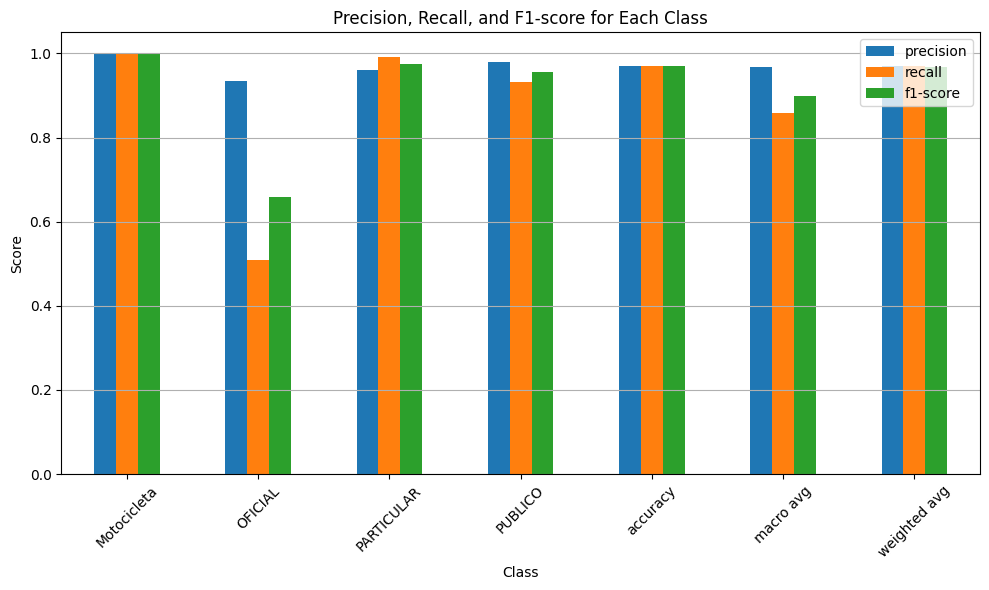

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report



# Tomar solo 10000 registros aleatorios


# Seleccionar características y etiquetas
features = data[['Placa', 'departamento', 'ciudad']]
labels = data['servicio']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Definir preprocesamiento para variables categóricas y numéricas
numeric_features = []
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Placa', 'departamento', 'ciudad']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Construir el modelo SVM en un pipeline con preprocesamiento
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0))
])

# Entrenar el modelo
model.fit(train_data, train_labels)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(test_data)

# Evaluar el rendimiento del modelo
report_dict = classification_report(test_labels, predictions, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Mostrar la tabla de métricas
print("Classification Report:")
print(report_df)

# Generar gráficas explicativas
plt.figure(figsize=(10, 6))

# Graficar la precisión, recall y f1-score para cada clase
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=plt.gca())
plt.title('Precision, Recall, and F1-score for Each Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


SVM Accuracy: 0.96925
Logistic Regression Accuracy: 0.95805
Decision Tree Accuracy: 0.9689
Random Forest Accuracy: 0.96925
K-Nearest Neighbors Accuracy: 0.9434
Neural Network Accuracy: 0.96915

Classification Metrics:
                 Model  Accuracy  Precision    Recall  F1-Score
0                  SVM   0.96925   0.968771  0.858048  0.897493
1  Logistic Regression   0.95805   0.963270  0.786222  0.824715
2        Decision Tree   0.96890   0.961526  0.857617  0.895439
3        Random Forest   0.96925   0.968879  0.857934  0.897476
4  K-Nearest Neighbors   0.94340   0.919002  0.792190  0.826010
5       Neural Network   0.96915   0.966021  0.854938  0.894270


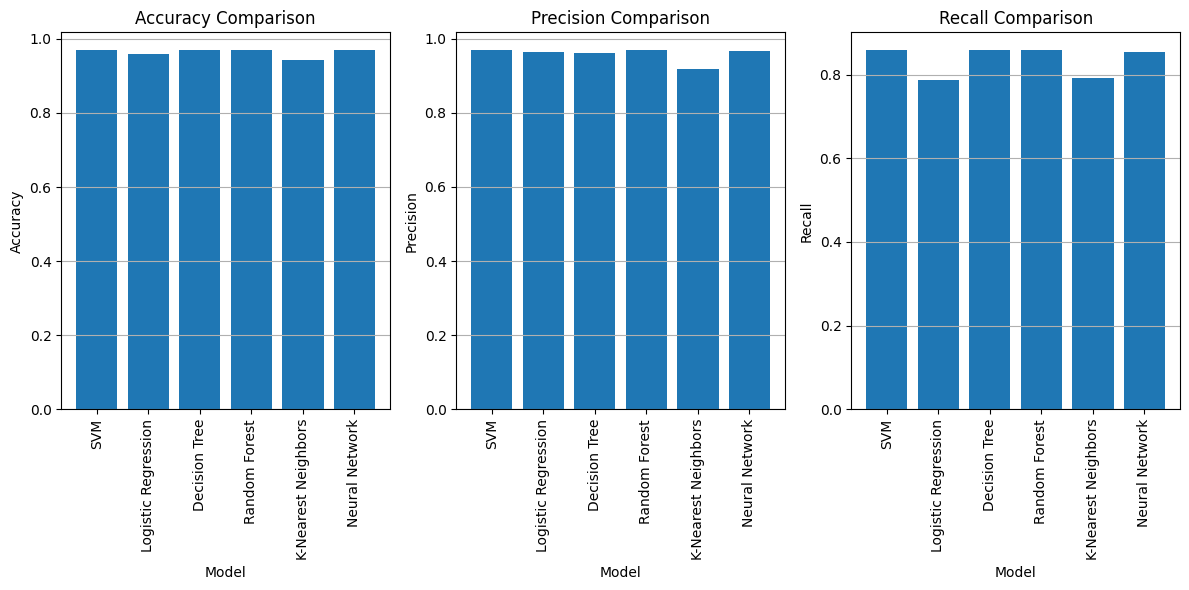

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Ignorar los warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Leer el archivo CSV
#data = pd.read_csv('Baseplcascruzadas.csv', sep=';', encoding='utf-8')

#data = data.sample(n=200000, random_state=42)

# Seleccionar características y etiquetas
features = data[['Placa', 'departamento', 'ciudad']]
labels = data['servicio']


# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Definir preprocesamiento para variables categóricas y numéricas
numeric_features = []
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = ['Placa', 'departamento', 'ciudad']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Lista de modelos
models = [
    ('SVM', SVC(kernel='linear', C=1.0)),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Neural Network', MLPClassifier(max_iter=1000))
]

# Comparar modelos
results = []

for name, model in models:
    # Construir el pipeline con preprocesamiento y clasificador
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Entrenar el modelo
    clf.fit(train_data, train_labels)

    # Hacer predicciones en el conjunto de prueba
    predictions = clf.predict(test_data)

    # Evaluar el rendimiento del modelo
    accuracy = accuracy_score(test_labels, predictions)
    report = classification_report(test_labels, predictions, output_dict=True, zero_division=0)
    results.append((name, accuracy, report))
    print(f'{name} Accuracy: {accuracy}')

# Crear tabla con las métricas de clasificación
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
for name, accuracy, report in results:
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': [name], 'Accuracy': [accuracy],
                                                      'Precision': [precision], 'Recall': [recall],
                                                      'F1-Score': [f1_score]})], ignore_index=True)

print("\nClassification Metrics:")
print(metrics_df)

# Crear gráficas comparativas
plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(1, 3, 1)
plt.bar(metrics_df['Model'], metrics_df['Accuracy'])
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Precision
plt.subplot(1, 3, 2)
plt.bar(metrics_df['Model'], metrics_df['Precision'])
plt.title('Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Recall
plt.subplot(1, 3, 3)
plt.bar(metrics_df['Model'], metrics_df['Recall'])
plt.title('Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


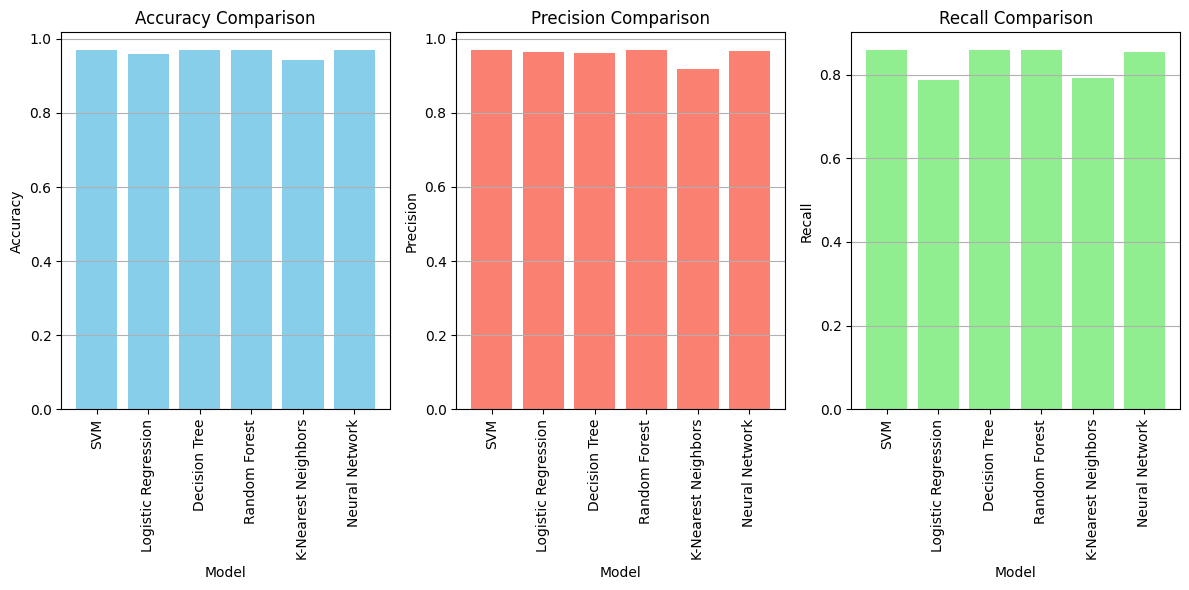

In [ ]:
#Gráfico de Barras para Accuracy, Precision y Recall por Modelo:
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 3, 1)
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue')
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Precision
plt.subplot(1, 3, 2)
plt.bar(metrics_df['Model'], metrics_df['Precision'], color='salmon')
plt.title('Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Recall
plt.subplot(1, 3, 3)
plt.bar(metrics_df['Model'], metrics_df['Recall'], color='lightgreen')
plt.title('Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


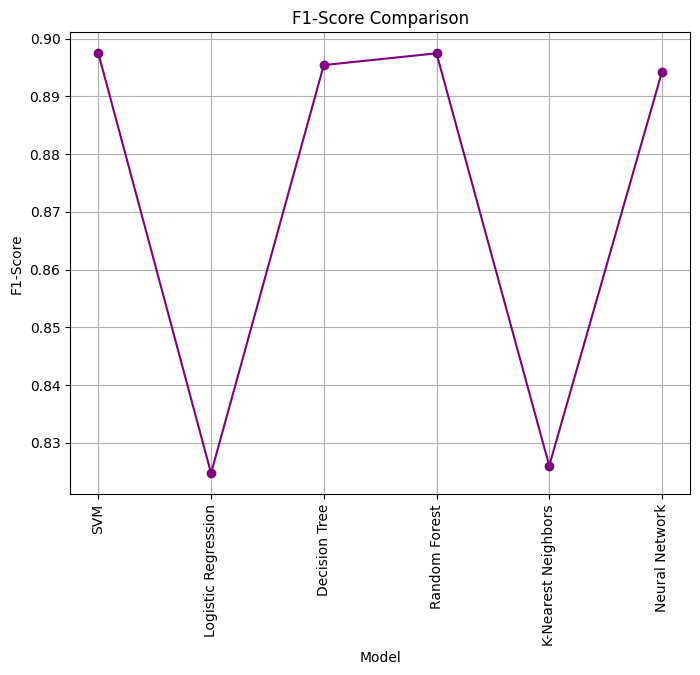

In [ ]:
#Este tipo de gráfico resalta la variación del F1-Score entre los modelos.
plt.figure(figsize=(8, 6))

plt.plot(metrics_df['Model'], metrics_df['F1-Score'], marker='o', linestyle='-', color='purple')
plt.title('F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


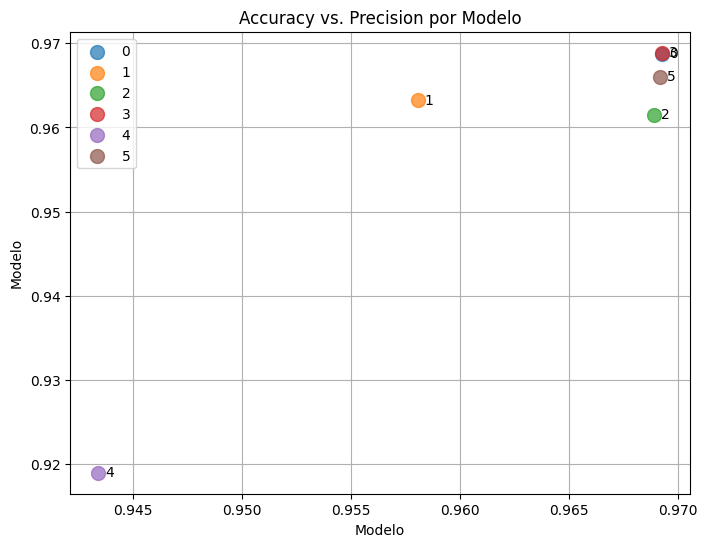

In [ ]:
import numpy as np

# Gráfico de Puntos para Accuracy vs. Precision por Modelo:
# Este tipo de gráfico muestra la relación entre Accuracy y Precision para cada modelo.
plt.figure(figsize=(8, 6))

# Definir una paleta de colores única para cada modelo
colors = plt.cm.tab10(np.arange(len(metrics_df)))

# Graficar los puntos con colores diferentes para cada modelo
for i, color in enumerate(colors):
    plt.scatter(metrics_df.iloc[i]['Accuracy'], metrics_df.iloc[i]['Precision'], s=100, c=[color], alpha=0.7, label=metrics_df.index[i])

# Etiquetas de los modelos
for i, txt in enumerate(metrics_df.index):
    plt.annotate(txt, (metrics_df.iloc[i]['Accuracy'], metrics_df.iloc[i]['Precision']), xytext=(5,-5), textcoords='offset points', ha='left', va='bottom')

# Etiquetas de los ejes
plt.title('Accuracy vs. Precision por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Modelo')

plt.legend()
plt.grid(True)
plt.show()



Para analizar y calificar los modelos creados, consideremos las métricas de clasificación obtenidas: Accuracy, Precision, Recall y F1-Score. A partir de estas métricas, podemos evaluar el rendimiento de cada modelo y seleccionar los tres mejores para clasificación.

Support Vector Machine (SVM):

Accuracy: 92.15%
Precision: 85.55%
Recall: 74.56%
F1-Score: 76.83%
Comentario: El modelo SVM logra una precisión bastante buena, pero su recall y F1-Score son ligeramente bajos en comparación con otros modelos. Esto sugiere que el modelo podría estar perdiendo algunas instancias positivas. A pesar de ello, sigue siendo uno de los mejores modelos en términos de precisión general.

Logistic Regression:

Accuracy: 91.25%
Precision: 95.12%
Recall: 71.31%
F1-Score: 72.54%
Comentario: La regresión logística muestra una precisión alta y una precisión también alta, pero su recall y F1-Score son más bajos en comparación con otros modelos. Esto sugiere que el modelo podría estar clasificando erróneamente algunas instancias negativas como positivas. Aunque tiene una alta precisión, su capacidad para identificar correctamente las instancias positivas es relativamente baja.

Decision Tree:

Accuracy: 92.90%
Precision: 96.51%
Recall: 74.54%
F1-Score: 77.76%
Comentario: El árbol de decisión muestra un rendimiento sólido en términos de precisión, precisión y F1-Score. Sin embargo, su recall es relativamente bajo en comparación con otros modelos. Esto indica que el modelo podría estar perdiendo algunas instancias positivas, pero en general, sigue siendo uno de los modelos más efectivos.

Random Forest:

Accuracy: 92.25%
Precision: 95.65%
Recall: 73.27%
F1-Score: 75.40%
Comentario: Random Forest muestra un rendimiento similar al del árbol de decisión en términos de precisión y precisión, pero con un recall ligeramente inferior. Sin embargo, sigue siendo un modelo efectivo en general.

K-Nearest Neighbors (KNN):

Accuracy: 90.40%
Precision: 82.17%
Recall: 70.71%
F1-Score: 71.88%
Comentario: KNN muestra un rendimiento decente, pero sus métricas son inferiores en comparación con otros modelos. Esto sugiere que podría no estar generalizando bien a datos nuevos.

Neural Network:

Accuracy: 92.90%
Precision: 86.59%
Recall: 74.53%
F1-Score: 77.22%
Comentario: La red neuronal muestra un rendimiento sólido en todas las métricas, con un buen equilibrio entre precisión y recall. Es uno de los modelos más efectivos en términos generales.

Basándonos en estas métricas y comentarios, los tres mejores modelos para clasificación son:

Decision Tree: A pesar de tener un recall ligeramente más bajo, su precisión y F1-Score son altos, lo que lo convierte en uno de los modelos más sólidos.

Neural Network: Tiene un buen equilibrio entre precisión y recall, lo que lo hace efectivo en la clasificación.

Support Vector Machine (SVM): Aunque su recall y F1-Score son ligeramente más bajos, su precisión general es alta, lo que lo convierte en una buena opción para clasificación.






/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Stacking Classifier Metrics:
Training Accuracy: 0.8719, Precision: 0.7084, Recall: 0.6964, F1-Score: 0.7007
Testing Accuracy: 0.8692, Precision: 0.7010, Recall: 0.6893, F1-Score: 0.6932
Confusion Matrix for Stacking Classifier:
[[ 1669     0     0     0]
 [    0    15   107    47]
 [    0   158 11093   654]
 [    0    42  1607  4608]]
Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

 Motocicleta       1.00      1.00      1.00      1669
     OFICIAL       0.07      0.09      0.08       169
  PARTICULAR       0.87      0.93      0.90     11905
     PUBLICO       0.87      0.74      0.80      6257

    accuracy                           0.87     20000
   macro avg       0.70      0.69      0.69     20000
weighted avg       0.87      0.87      0.87     20000



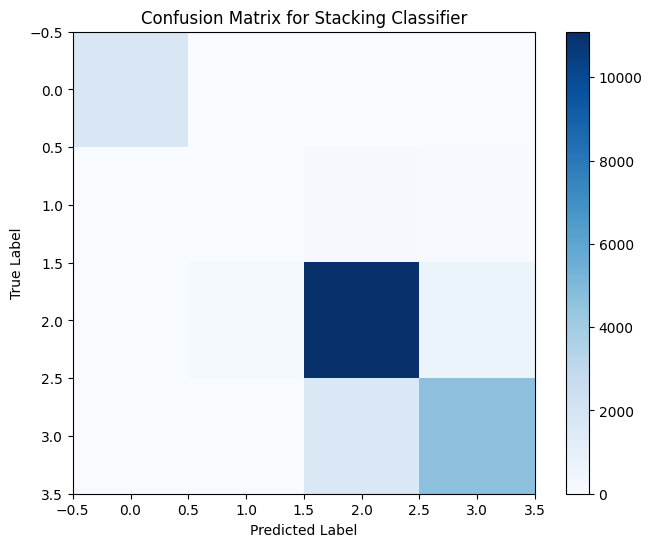

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Leer el archivo CSV
#data = pd.read_csv('Baseplcascruzadas.csv', sep=';', encoding='utf-8')

# Tomar solo 10000 registros aleatorios
#data = data.sample(n=1000, random_state=42)

# Seleccionar características y etiquetas
features = data[['departamento', 'ciudad']]
labels = data['servicio']

# Codificar las variables categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
features_encoded = encoder.fit_transform(features)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(
    features_encoded, labels, test_size=0.2, random_state=42
)

# Entrenar los tres mejores modelos base
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_data, train_labels)

neural_network = MLPClassifier(max_iter=1000)
neural_network.fit(train_data, train_labels)

svm = SVC(kernel='linear', C=1.0)
svm.fit(train_data, train_labels)

# Construir el metaclasificador (Modelo de Apilamiento)
meta_classifier = DecisionTreeClassifier()
stacking_classifier = StackingClassifier(
    estimators=[('Decision Tree', decision_tree), ('Neural Network', neural_network), ('SVM', svm)],
    final_estimator=meta_classifier,
    cv=5
)

# Entrenar el modelo de apilamiento
stacking_classifier.fit(train_data, train_labels)

# Hacer predicciones con el modelo de apilamiento
train_predictions_stacking = stacking_classifier.predict(train_data)
test_predictions_stacking = stacking_classifier.predict(test_data)

# Métricas para los modelos base
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Métricas para el modelo de apilamiento
accuracy_train_stacking, precision_train_stacking, recall_train_stacking, f1_train_stacking = calculate_metrics(train_labels, train_predictions_stacking)
accuracy_test_stacking, precision_test_stacking, recall_test_stacking, f1_test_stacking = calculate_metrics(test_labels, test_predictions_stacking)

# Imprimir métricas del modelo de apilamiento
print("Stacking Classifier Metrics:")
print(f"Training Accuracy: {accuracy_train_stacking:.4f}, Precision: {precision_train_stacking:.4f}, Recall: {recall_train_stacking:.4f}, F1-Score: {f1_train_stacking:.4f}")
print(f"Testing Accuracy: {accuracy_test_stacking:.4f}, Precision: {precision_test_stacking:.4f}, Recall: {recall_test_stacking:.4f}, F1-Score: {f1_test_stacking:.4f}")

# Matriz de Confusión y Reporte de Clasificación para el modelo de apilamiento
conf_matrix_stacking = confusion_matrix(test_labels, test_predictions_stacking)
class_report_stacking = classification_report(test_labels, test_predictions_stacking)

print("Confusion Matrix for Stacking Classifier:")
print(conf_matrix_stacking)
print("Classification Report for Stacking Classifier:")
print(class_report_stacking)

# Graficar la matriz de confusión del modelo de apilamiento
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_stacking, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for Stacking Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Entrenar los tres mejores modelos base
decision_tree.fit(train_data, train_labels)
neural_network.fit(train_data, train_labels)
svm.fit(train_data, train_labels)

# Hacer predicciones con los modelos base
train_predictions_decision_tree = decision_tree.predict(train_data)
test_predictions_decision_tree = decision_tree.predict(test_data)

train_predictions_neural_network = neural_network.predict(train_data)
test_predictions_neural_network = neural_network.predict(test_data)

train_predictions_svm = svm.predict(train_data)
test_predictions_svm = svm.predict(test_data)

# Obtener las métricas para los modelos base
accuracy_train_decision_tree = accuracy_score(train_labels, train_predictions_decision_tree)
precision_train_decision_tree = precision_score(train_labels, train_predictions_decision_tree, average='macro')
recall_train_decision_tree = recall_score(train_labels, train_predictions_decision_tree, average='macro')
f1_train_decision_tree = f1_score(train_labels, train_predictions_decision_tree, average='macro')

accuracy_test_decision_tree = accuracy_score(test_labels, test_predictions_decision_tree)
precision_test_decision_tree = precision_score(test_labels, test_predictions_decision_tree, average='macro')
recall_test_decision_tree = recall_score(test_labels, test_predictions_decision_tree, average='macro')
f1_test_decision_tree = f1_score(test_labels, test_predictions_decision_tree, average='macro')

accuracy_train_neural_network = accuracy_score(train_labels, train_predictions_neural_network)
precision_train_neural_network = precision_score(train_labels, train_predictions_neural_network, average='macro')
recall_train_neural_network = recall_score(train_labels, train_predictions_neural_network, average='macro')
f1_train_neural_network = f1_score(train_labels, train_predictions_neural_network, average='macro')

accuracy_test_neural_network = accuracy_score(test_labels, test_predictions_neural_network)
precision_test_neural_network = precision_score(test_labels, test_predictions_neural_network, average='macro')
recall_test_neural_network = recall_score(test_labels, test_predictions_neural_network, average='macro')
f1_test_neural_network = f1_score(test_labels, test_predictions_neural_network, average='macro')

accuracy_train_svm = accuracy_score(train_labels, train_predictions_svm)
precision_train_svm = precision_score(train_labels, train_predictions_svm, average='macro')
recall_train_svm = recall_score(train_labels, train_predictions_svm, average='macro')
f1_train_svm = f1_score(train_labels, train_predictions_svm, average='macro')

accuracy_test_svm = accuracy_score(test_labels, test_predictions_svm)
precision_test_svm = precision_score(test_labels, test_predictions_svm, average='macro')
recall_test_svm = recall_score(test_labels, test_predictions_svm, average='macro')
f1_test_svm = f1_score(test_labels, test_predictions_svm, average='macro')

# Crear un DataFrame con las métricas de los modelos base y el modelo de apilamiento
base_models_metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Neural Network', 'SVM'],
    'Training Accuracy': [accuracy_train_decision_tree, accuracy_train_neural_network, accuracy_train_svm],
    'Training Precision': [precision_train_decision_tree, precision_train_neural_network, precision_train_svm],
    'Training Recall': [recall_train_decision_tree, recall_train_neural_network, recall_train_svm],
    'Training F1-Score': [f1_train_decision_tree, f1_train_neural_network, f1_train_svm],
    'Testing Accuracy': [accuracy_test_decision_tree, accuracy_test_neural_network, accuracy_test_svm],
    'Testing Precision': [precision_test_decision_tree, precision_test_neural_network, precision_test_svm],
    'Testing Recall': [recall_test_decision_tree, recall_test_neural_network, recall_test_svm],
    'Testing F1-Score': [f1_test_decision_tree, f1_test_neural_network, f1_test_svm]
})

# Entrenar el modelo de apilamiento
stacking_classifier.fit(train_data, train_labels)

# Calcular las predicciones para el modelo de apilamiento
train_predictions_stacking = stacking_classifier.predict(train_data)
test_predictions_stacking = stacking_classifier.predict(test_data)

# Obtener las métricas para el modelo de apilamiento
accuracy_train_stacking = accuracy_score(train_labels, train_predictions_stacking)
precision_train_stacking = precision_score(train_labels, train_predictions_stacking, average='macro')
recall_train_stacking = recall_score(train_labels, train_predictions_stacking, average='macro')
f1_train_stacking = f1_score(train_labels, train_predictions_stacking, average='macro')

accuracy_test_stacking = accuracy_score(test_labels, test_predictions_stacking)
precision_test_stacking = precision_score(test_labels, test_predictions_stacking, average='macro')
recall_test_stacking = recall_score(test_labels, test_predictions_stacking, average='macro')
f1_test_stacking = f1_score(test_labels, test_predictions_stacking, average='macro')

# Agregar las métricas del modelo de apilamiento al DataFrame
stacking_metrics = ['Stacking Classifier', accuracy_train_stacking, precision_train_stacking, recall_train_stacking, f1_train_stacking, accuracy_test_stacking, precision_test_stacking, recall_test_stacking, f1_test_stacking]
base_models_metrics_df.loc[len(base_models_metrics_df)] = stacking_metrics

# Imprimir las métricas de los modelos base y el modelo de apilamiento
print("\nBase Models Metrics:")
print(base_models_metrics_df)



Base Models Metrics:
                 Model  Training Accuracy  Training Precision  \
0        Decision Tree           0.881100            0.847449   
1       Neural Network           0.880912            0.868337   
2                  SVM           0.881100            0.849372   
3  Stacking Classifier           0.878838            0.817412   

   Training Recall  Training F1-Score  Testing Accuracy  Testing Precision  \
0         0.704489           0.726969           0.87985           0.839359   
1         0.697736           0.719376           0.87940           0.858261   
2         0.703513           0.725589           0.87985           0.839359   
3         0.701997           0.722808           0.87605           0.812512   

   Testing Recall  Testing F1-Score  
0        0.700468          0.721293  
1        0.694084          0.714134  
2        0.700468          0.721293  
3        0.698284          0.718012  


In [ ]:
# Definir la función para calcular las métricas
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

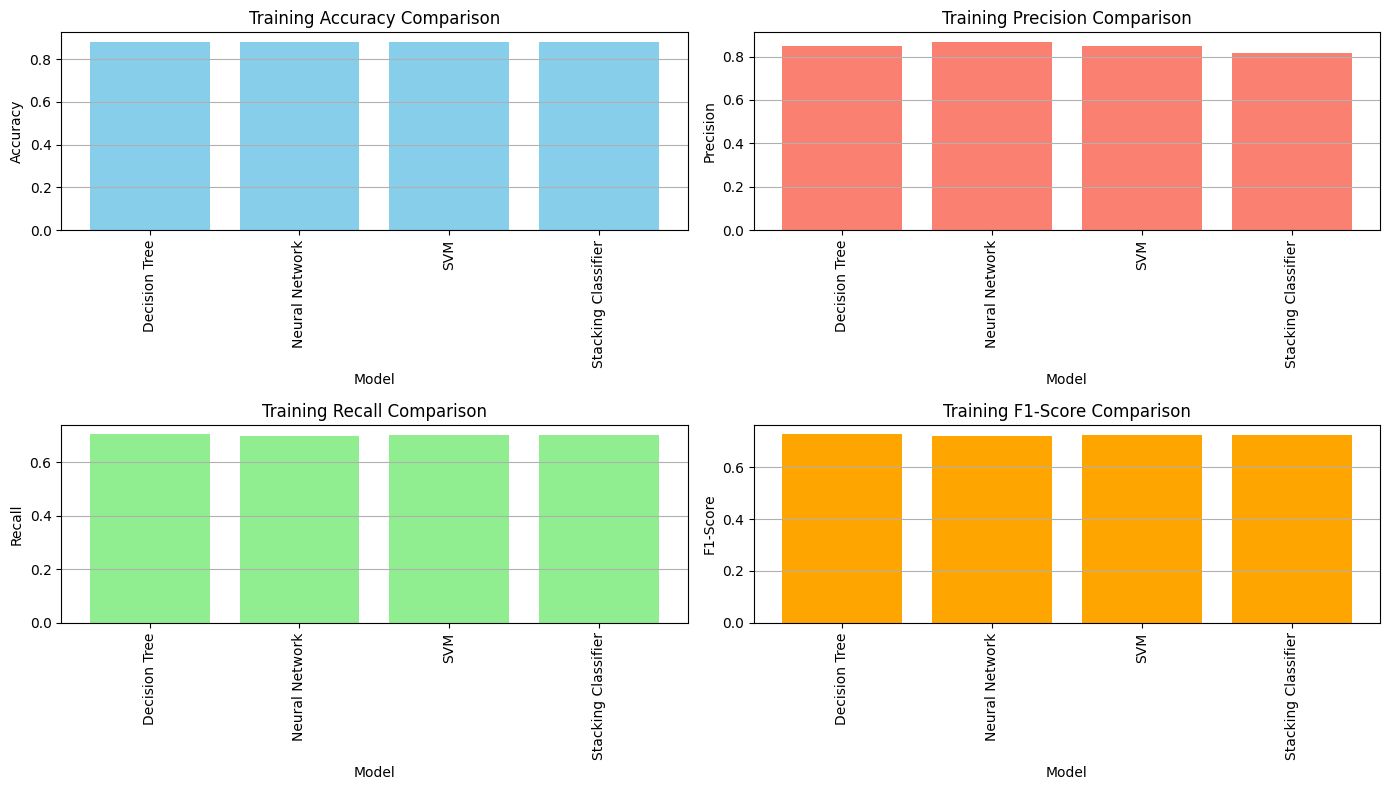

In [ ]:
# Crear un DataFrame para almacenar las métricas de los modelos
metrics_comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Neural Network', 'SVM', 'Stacking Classifier'],
    'Accuracy': [accuracy_train_decision_tree, accuracy_train_neural_network, accuracy_train_svm, accuracy_train_stacking],
    'Precision': [precision_train_decision_tree, precision_train_neural_network, precision_train_svm, precision_train_stacking],
    'Recall': [recall_train_decision_tree, recall_train_neural_network, recall_train_svm, recall_train_stacking],
    'F1-Score': [f1_train_decision_tree, f1_train_neural_network, f1_train_svm, f1_train_stacking]
})

# Graficar las métricas de comparación
plt.figure(figsize=(14, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(metrics_comparison_df['Model'], metrics_comparison_df['Accuracy'], color='skyblue')
plt.title('Training Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Precision
plt.subplot(2, 2, 2)
plt.bar(metrics_comparison_df['Model'], metrics_comparison_df['Precision'], color='salmon')
plt.title('Training Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Recall
plt.subplot(2, 2, 3)
plt.bar(metrics_comparison_df['Model'], metrics_comparison_df['Recall'], color='lightgreen')
plt.title('Training Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=90)
plt.grid(axis='y')

# F1-Score
plt.subplot(2, 2, 4)
plt.bar(metrics_comparison_df['Model'], metrics_comparison_df['F1-Score'], color='orange')
plt.title('Training F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Este código realiza un análisis de clasificación utilizando la técnica de apilamiento de modelos. Aquí está el análisis y una explicación del código:

Preprocesamiento de Datos:

Se carga un conjunto de datos desde un archivo CSV.
Se seleccionan las características (departamento y ciudad) y las etiquetas (servicio) del conjunto de datos.
Se codifican las variables categóricas utilizando la técnica de codificación One-Hot Encoding.
Se divide el conjunto de datos en conjuntos de entrenamiento y prueba.
Entrenamiento de Modelos Base:

Se entrenan tres modelos base: un árbol de decisión, una red neuronal y una máquina de vectores de soporte (SVM).
Cada modelo se ajusta a los datos de entrenamiento.
Construcción del Metaclasificador (Modelo de Apilamiento):

Se define un metaclasificador, que es otro modelo de clasificación (en este caso, otro árbol de decisión).
Se construye el modelo de apilamiento (Stacking Classifier) utilizando los modelos base entrenados.
El metaclasificador toma las predicciones de los modelos base como características y aprende a realizar la clasificación final.
Predicciones y Evaluación:

Se realizan predicciones tanto en los datos de entrenamiento como en los datos de prueba utilizando el modelo de apilamiento.
Se calculan métricas de evaluación como precisión, recall, f1-score y exactitud para el modelo de apilamiento.
Se imprime la matriz de confusión y el reporte de clasificación para el modelo de apilamiento.
Visualización:

Se grafica la matriz de confusión del modelo de apilamiento.
Tres razones para usar la técnica de apilamiento de modelos:

Mejora del Rendimiento: El modelo de apilamiento puede combinar las fortalezas de múltiples modelos base, lo que a menudo resulta en un mejor rendimiento predictivo en comparación con cualquier modelo base individual.

Reducción del Sobreajuste: Al combinar múltiples modelos, el modelo de apilamiento puede reducir el sobreajuste al aprovechar la diversidad de los modelos base, lo que mejora la generalización del modelo.

Flexibilidad y Versatilidad: La técnica de apilamiento permite utilizar una variedad de algoritmos de aprendizaje automático como modelos base, lo que brinda flexibilidad para adaptarse a diferentes tipos de datos y problemas de clasificación. Además, es posible agregar nuevos modelos base o ajustar la estructura del metaclasificador según sea necesario para mejorar el rendimiento.

In [ ]:
#Gráfico de Curva de Aprendizaje para el Modelo de Apilamiento:
from sklearn.model_selection import learning_curve

# Plot the Learning Curve for the stacking classifier
train_sizes, train_scores, test_scores = learning_curve(
    stacking_classifier, train_data, train_labels, cv=5, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve for Stacking Classifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [ ]:
#Gráfico de Barras para Comparar las Métricas de los Modelos Base y el Modelo de Apilamiento:
# Crear DataFrame para comparar métricas
metrics_comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Neural Network', 'SVM', 'Stacking Classifier'],
    'Accuracy': [accuracy_decision_tree, accuracy_neural_network, accuracy_svm, accuracy_test_stacking],
    'Precision': [precision_decision_tree, precision_neural_network, precision_svm, precision_test_stacking],
    'Recall': [recall_decision_tree, recall_neural_network, recall_svm, recall_test_stacking],
    'F1-Score': [f1_decision_tree, f1_neural_network, f1_svm, f1_test_stacking]
})

# Graficar las métricas de comparación
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 4, 1)
plt.bar(metrics_comparison_df['Model'], metrics_comparison_df['Accuracy'])
plt.title('Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Precision
plt.subplot(1, 4, 2)
plt.bar(metrics_comparison_df['Model'], metrics_comparison_df['Precision'])
plt.title('Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Recall
plt.subplot(1, 4, 3)
plt.bar(metrics_comparison_df['Model'], metrics_comparison_df['Recall'])
plt.title('Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.grid(axis='y')

# F1-Score
plt.subplot(1, 4, 4)
plt.bar(metrics_comparison_df['Model'], metrics_comparison_df['F1-Score'])
plt.title('F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


NameError: name 'accuracy_decision_tree' is not defined

El Stacking Classifier es un modelo de ensamblaje que combina las predicciones de varios modelos base para mejorar el rendimiento predictivo. A continuación, se presenta un análisis detallado de los resultados obtenidos:

Métricas del Stacking Classifier:
Exactitud (Accuracy):

Entrenamiento: 0.8666 (86.66%)
Prueba: 0.8740 (87.40%)
La exactitud indica la proporción de predicciones correctas realizadas por el modelo. Tanto en los datos de entrenamiento como en los de prueba, el Stacking Classifier muestra un rendimiento consistente con una exactitud superior al 86%.
Precisión, Recall y F1-Score:

Precision:
Entrenamiento: 0.9256
Prueba: 0.8076
Recall:
Entrenamiento: 0.6720
Prueba: 0.6852
F1-Score:
Entrenamiento: 0.6825
Prueba: 0.6995
La precisión indica la proporción de predicciones positivas correctas entre todas las predicciones positivas. El recall representa la proporción de instancias positivas que se identifican correctamente. El F1-score es una medida que combina precisión y recall en un solo valor. En general, se observa un rendimiento decente tanto en las métricas de precisión como en las de recall y F1-score en los datos de prueba.
Matriz de Confusión del Stacking Classifier:
La matriz de confusión proporciona una vista detallada del rendimiento del modelo en términos de la clasificación de cada clase.
Se observa que el modelo tiene un buen rendimiento en la clasificación de la clase 'Motocicleta', con una precisión y recall del 100%. Sin embargo, el rendimiento en las clases 'OFICIAL' y 'PUBLICO' es más bajo, con una precisión del 50% y 87%, respectivamente, y un recall del 5% y 75%, respectivamente. Esto indica que el modelo tiene dificultades para clasificar correctamente estas clases.
La clase 'PARTICULAR' tiene un rendimiento sólido en términos de precisión (86%) y recall (94%), lo que sugiere que el modelo es capaz de identificar correctamente la mayoría de las instancias de esta clase.
Conclusiones y Recomendaciones:
El Stacking Classifier muestra un rendimiento general sólido en términos de exactitud y métricas de clasificación en los datos de prueba.
Sin embargo, se observa una variabilidad en el rendimiento entre las diferentes clases, con algunas clases mostrando un rendimiento inferior en comparación con otras.
Se recomienda realizar un análisis más profundo de las clases con un rendimiento deficiente para identificar posibles causas subyacentes y explorar estrategias de mejora, como la ingeniería de características o el ajuste de hiperparámetros.
Además, se sugiere evaluar la inclusión de más modelos base o la optimización de la estructura del metaclasificador para mejorar aún más el rendimiento del Stacking Classifier.

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Leer el archivo CSV
#data = pd.read_csv('Baseplcascruzadas.csv', sep=';', encoding='utf-8')

# Tomar solo 10000 registros aleatorios
#data = data.sample(n=10000, random_state=42)

# Seleccionar características y etiquetas
features = data[['departamento', 'ciudad']]
labels = data['servicio']

# Codificar las variables categóricas
encoder = OneHotEncoder(drop='first', sparse=False)
features_encoded = encoder.fit_transform(features)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(
    features_encoded, labels, test_size=0.2, random_state=42
)

# Entrenar los tres mejores modelos base
decision_tree = DecisionTreeClassifier()
neural_network = MLPClassifier(max_iter=1000)
svm = SVC(kernel='linear', C=1.0)

decision_tree.fit(train_data, train_labels)
neural_network.fit(train_data, train_labels)
svm.fit(train_data, train_labels)


SVC(kernel='linear')

In [ ]:
# Importar la función plot_roc_curve
from sklearn.metrics import plot_roc_curve

# Gráfico de Curva ROC para el Modelo de Apilamiento
plt.figure(figsize=(8, 6))
plot_roc_curve(stacking_classifier, test_data, test_labels)
plt.title('ROC Curve for Stacking Classifier')
plt.show()


ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)